Instructions



Your tasks are to do the following:


Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.


Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of data points for each treatment regimen.


NOTE: These plots should look identical.



Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.


NOTE: These plots should look identical.



Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.


Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.


Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.


Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.


Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.


Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.


Here are some final considerations:


You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.


See the starter workbook for help on what modules to import and expected format of the notebook.



Hints and Considerations


Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.


You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.


Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.


While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.


Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:


How does my DataFrame need to be structured for me to have the right x-axis and y-axis?


How do I build a basic scatter plot?


How do I add a label to that scatter plot?


Where would the labels for that scatter plot come from?


Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.


Get help when you need it! There is never any shame in asking. But, as always, ask a specific question. You'll never get a great answer to "I'm lost."

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [5]:
# Study data files
mouse_metadata =pd.read_csv(r'C:\Users\1000204905\Desktop\Matplot\mouse_metadata.csv',encoding='latin-1')
study_results =pd.read_csv(r'C:\Users\1000204905\Desktop\Matplot\study_results.csv',encoding='latin-1')

In [6]:
# Combine the data into a single dataset  Summary statistics
data=pd.merge(mouse_metadata,study_results,how='outer')

In [7]:
data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary=data[['Drug Regimen','Tumor Volume (mm3)']]

In [40]:
summ_mean=summary.groupby('Drug Regimen').mean()
summ_mean

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [42]:
summ_median=summary.groupby('Drug Regimen').median()
summ_median

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [9]:
summ_var=summary.groupby('Drug Regimen').var()
summ_var

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [10]:
summ_std=summary.groupby('Drug Regimen').std()
summ_std

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [11]:
summ_sem=summary.groupby('Drug Regimen').sem()
summ_sem

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


# Bar plots

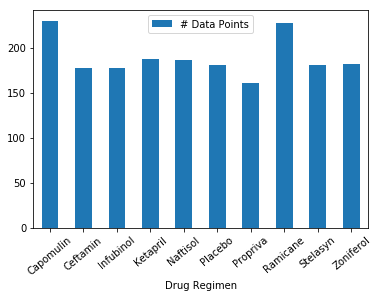

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas 
summ_count=summary.groupby('Drug Regimen').count()
bar_count=summ_count.plot.bar(rot=40)
plt.legend(['# Data Points'])

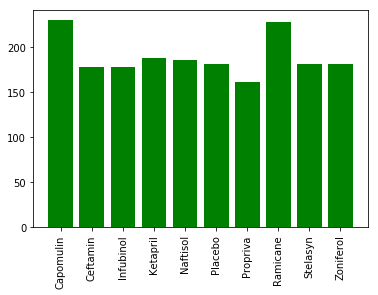

In [28]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Drug_Regimen=['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
Data_Points=[230,178,178,188,186,181,161,228,181,182]
plt.bar(Drug_Regimen,Data_Points,color='g')
plt.xticks(rotation='vertical')
plt.show()

# Pie plots


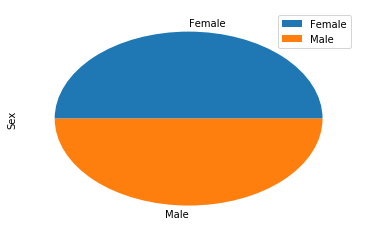

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_perc=data.groupby('Sex').nunique()
gender_perc.plot.pie(y='Sex')

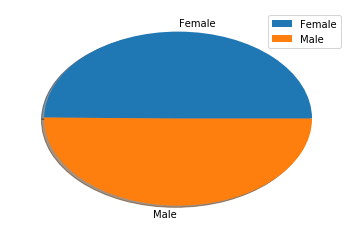

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_perc
gender=['Female','Male']
number=[124,125]
explode=[0.1,0.0]
plt.pie(number,labels=gender,shadow=True)
plt.legend()

# Quartiles, outliers and boxplots

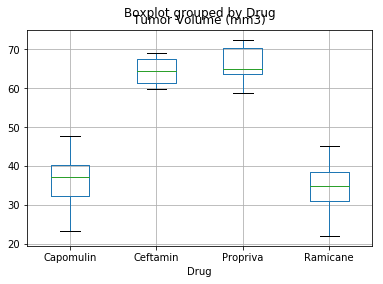

In [137]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
final_tumor=data[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
final_tumor_pd=pd.DataFrame(final_tumor)
final_tumor_pd.rename(columns={"Drug Regimen":"Drug"},inplace=True)

filter_list= ['Capomulin','Ceftamin','Propriva','Ramicane']
filter_drug=final_tumor_pd[final_tumor_pd.Drug.isin(filter_list)]
filter_timepoint_list=[45]
filter_timepoint=filter_drug[filter_drug.Timepoint.isin(filter_timepoint_list)]
filter_timepoint

filter_timepoint.boxplot(by='Drug',column=['Tumor Volume (mm3)'])

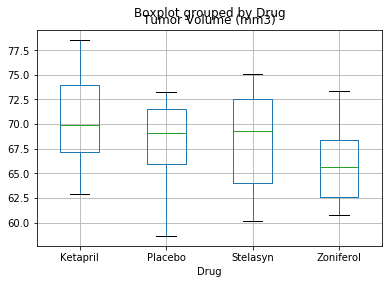

In [138]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor=data[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
final_tumor_pd=pd.DataFrame(final_tumor)
final_tumor_pd.rename(columns={"Drug Regimen":"Drug"},inplace=True)

filter_list= ['Ketapril','Placebo','Zoniferol','Stelasyn']
filter_drug=final_tumor_pd[final_tumor_pd.Drug.isin(filter_list)]
filter_timepoint_list=[45]
filter_timepoint=filter_drug[filter_drug.Timepoint.isin(filter_timepoint_list)]

filter_timepoint.boxplot(by='Drug',column=['Tumor Volume (mm3)'])

# Line and scatter plots

Text(0.5,1,'Capomulin on Mouse = s185')

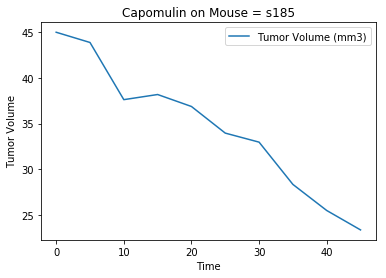

In [67]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_line=data[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
is_Capomulin=Capomulin_line['Drug Regimen']=='Capomulin'
Capomulin_data=Capomulin_line[is_Capomulin]
Mouse_capom=Capomulin_data['Mouse ID']=='s185'
Mouse_capomulin=Capomulin_data[Mouse_capom]
Mouse_capomulin.plot.line('Timepoint','Tumor Volume (mm3)')
plt.xlabel('Time')
plt.ylabel('Tumor Volume')
plt.title('Capomulin on Mouse = s185')

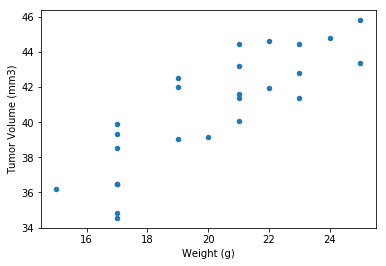

In [76]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_scatdata=data[['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
is_Capomulin_scat=Capomulin_scatdata['Drug Regimen']=='Capomulin'
Cap_data=Capomulin_scatdata[is_Capomulin_scat]
scat_final=Cap_data.groupby('Mouse ID').mean()
scat_final.plot.scatter('Weight (g)','Tumor Volume (mm3)')

In [89]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
tumor=scat_final.iloc[:,1]
weight=scat_final.iloc[:,0]
correlation =st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


y =0.95x + 21.55
The r-squared is: 0.7088568047708717


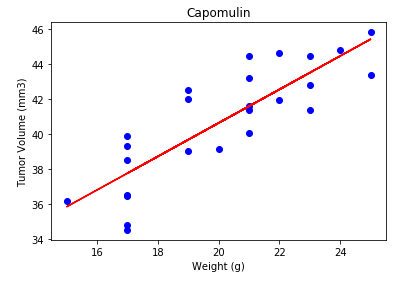

In [103]:
x_values=weight
y_values=tumor
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(x_values,y_values)
regression_values = x_values* slope + intercept
line= "y ="+str(round(slope,2))+"x + "+ str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values,color='b')
plt.plot(x_values,regression_values,color='r')

plt.annotate(line,(10,5),fontsize=20)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin')

print(f"The r-squared is: {rvalue**2}")

plt.show()